In [14]:
import numpy as np
import pandas as pd

from scipy.stats import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [15]:
df = pd.read_csv('train.csv', usecols= ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [18]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
df['Survived'].count()

np.int64(891)

In [19]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X, y

(           Age     Fare
 0    22.000000   7.2500
 1    38.000000  71.2833
 2    26.000000   7.9250
 3    35.000000  53.1000
 4    35.000000   8.0500
 ..         ...      ...
 886  27.000000  13.0000
 887  19.000000  30.0000
 888  29.699118  23.4500
 889  26.000000  30.0000
 890  32.000000   7.7500
 
 [891 rows x 2 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 2), (179, 2), (712,), (179,))

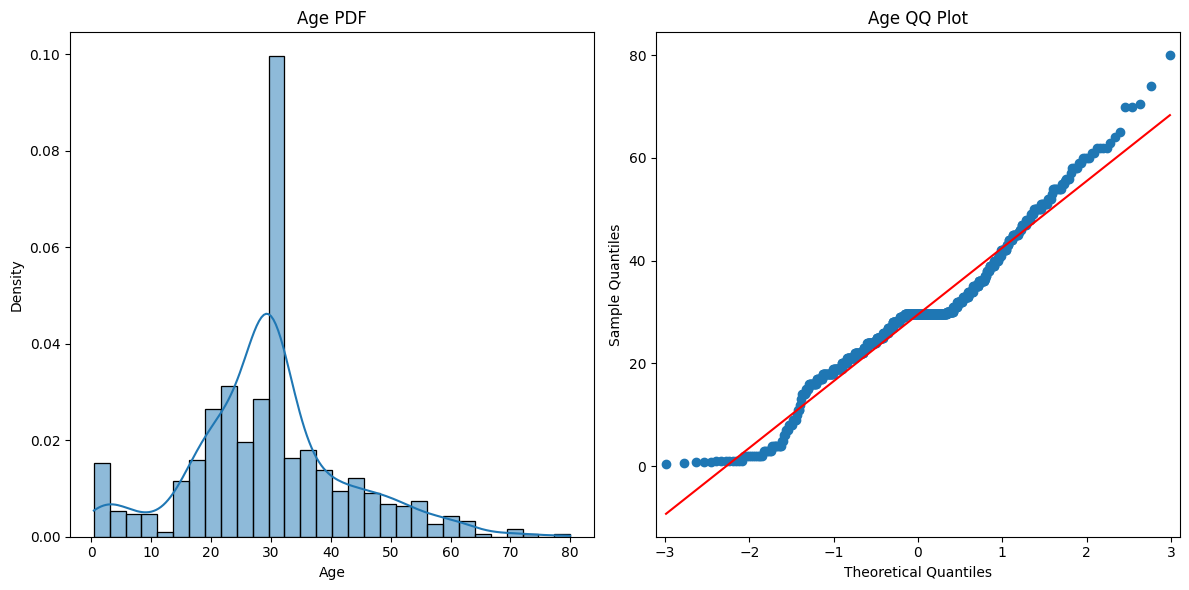

In [47]:
# QQ plot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

sns.histplot(X_train['Age'], kde=True, stat='density', bins=30, ax=ax1)
ax1.set_title('Age PDF')

import statsmodels.api as sm

sm.qqplot(X_train['Age'].dropna(), line='s', ax=ax2)
ax2.set_title('Age QQ Plot')
plt.tight_layout()
plt.show()

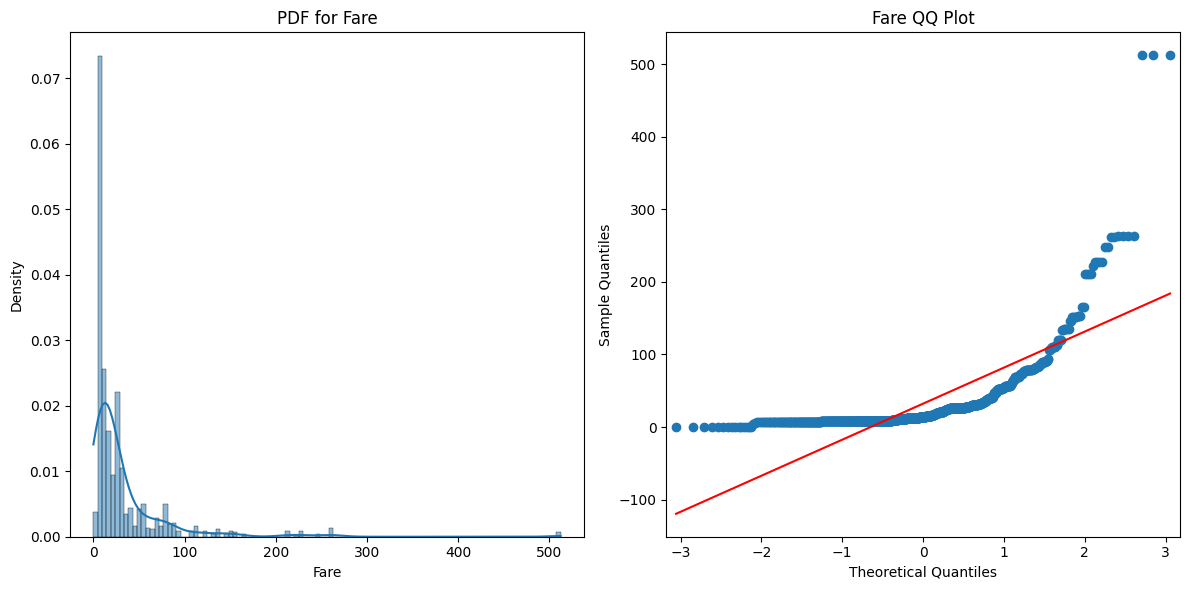

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

sns.histplot(df['Fare'], kde=True, stat='density', ax=ax1)
ax1.set_title("PDF for Fare")

import statsmodels.api as sm

sm.qqplot(X['Fare'].dropna(), line='s',ax= ax2)
ax2.set_title('Fare QQ Plot')
plt.tight_layout()
plt.show()

In [54]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [56]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print(f"Accuracy score(Logistic Regression): {accuracy_score(y_test, y_pred)}")
print(f"Accuracy score(Desicison Tree):      {accuracy_score(y_test, y_pred2)}")

Accuracy score(Logistic Regression): 0.6480446927374302
Accuracy score(Desicison Tree):      0.6703910614525139


In [57]:
trf = FunctionTransformer(func=np.log1p)

In [60]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [61]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [62]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred_trf = clf.predict(X_test_transformed)
y_pred_trf2 = clf2.predict(X_test_transformed)

print(f"Accuracy score(LR) : {accuracy_score(y_test, y_pred_trf)}")
print(f"Accuracy score(DT) : {accuracy_score(y_test, y_pred_trf2)}")

Accuracy score(LR) : 0.6815642458100558
Accuracy score(DT) : 0.6983240223463687


In [64]:
# Cross Validation
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6588514357053683


In [ ]:
import statsmodels.api as sm

sm.qqplot(X['Fare'].dropna(), line='s',ax= ax2)
ax2.set_title('Fare QQ Plot')
plt.tight_layout()
plt.show()

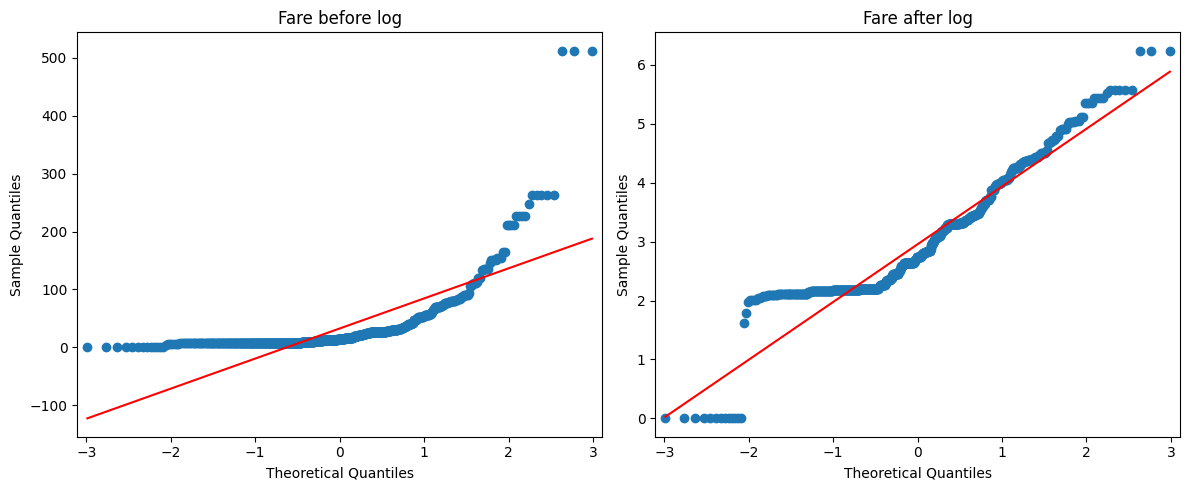

In [66]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize=(12, 5))

import statsmodels.api as sm

sm.qqplot(X_train['Fare'].dropna(), line='s', ax=ax1)
ax1.set_title('Fare before log')

sm.qqplot(X_train_transformed['Fare'].dropna(), line='s', ax=ax2)
ax2.set_title('Fare after log')
plt.tight_layout()
plt.show()

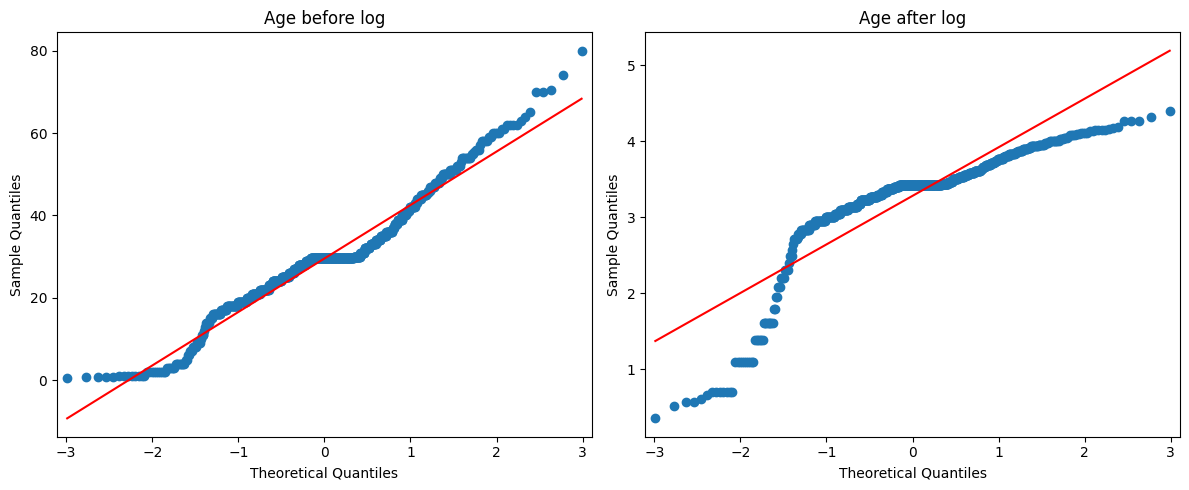

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
import statsmodels.api as sm

sm.qqplot(X_train['Age'].dropna(), line='s', ax=ax1)
ax1.set_title('Age before log')

sm.qqplot(X_train_transformed['Age'].dropna(), line='s', ax=ax2)
ax2.set_title('Age after log')
plt.tight_layout()
plt.show()

In [70]:
#Apply log transform on Fare only, as age is not right skew data, and it perform badly

In [76]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [77]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print(f"Accuracy LR: {accuracy_score(y_test, y_pred)}")
print(f"Accuracy DT: {accuracy_score(y_test, y_pred2)}")

Accuracy LR: 0.6703910614525139
Accuracy DT: 0.6759776536312849


In [79]:
X_transformed2 = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf,X_transformed2,y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2,X_transformed2, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6611111111111112


In [80]:
df.head(1)

,Survived,Age,Fare
0,0,22.0,7.25


In [98]:
def apply_transform(transform):
    X = df.iloc[:,1:]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')
    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()
    print(f"Accuracy", np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
    import statsmodels.api as sm
    sm.qqplot(X['Fare'].dropna(), line='s', ax=ax1)
    ax1.set_title("Fare before transform")
    
    sm.qqplot(X_trans[:,0], line='s', ax=ax2)
    ax2.set_title("Fare after transform")
    plt.tight_layout()
    plt.show()

Accuracy 0.6589013732833957


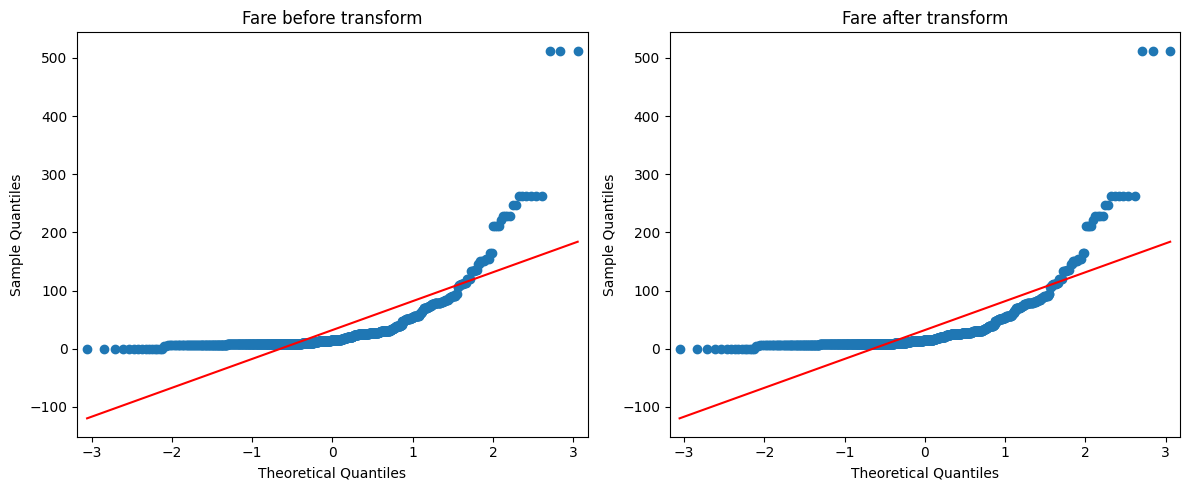

In [99]:
apply_transform(lambda x: x)

Accuracy 0.6431335830212235


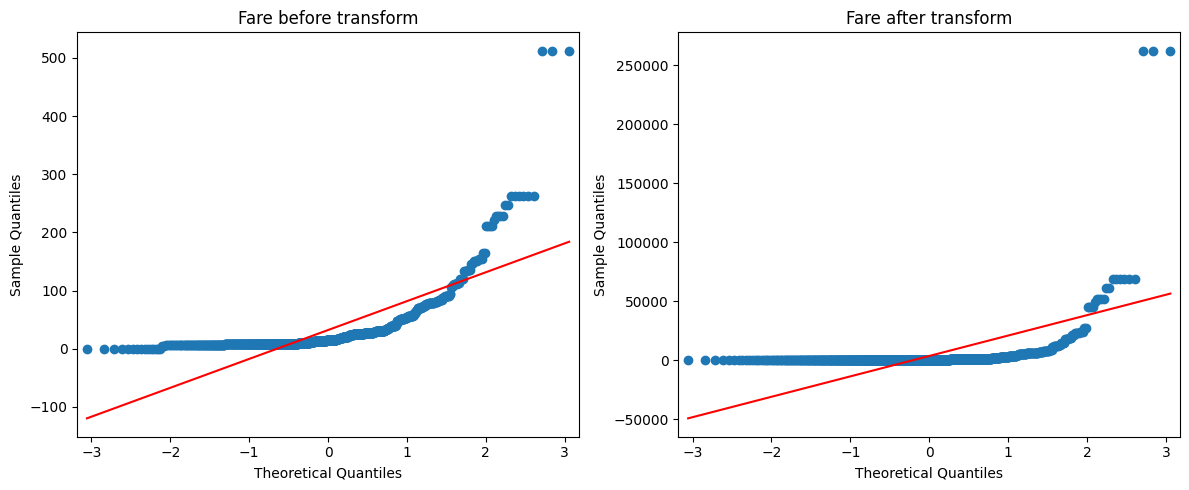

In [100]:
apply_transform(lambda x: x**2)

Accuracy 0.6262796504369538


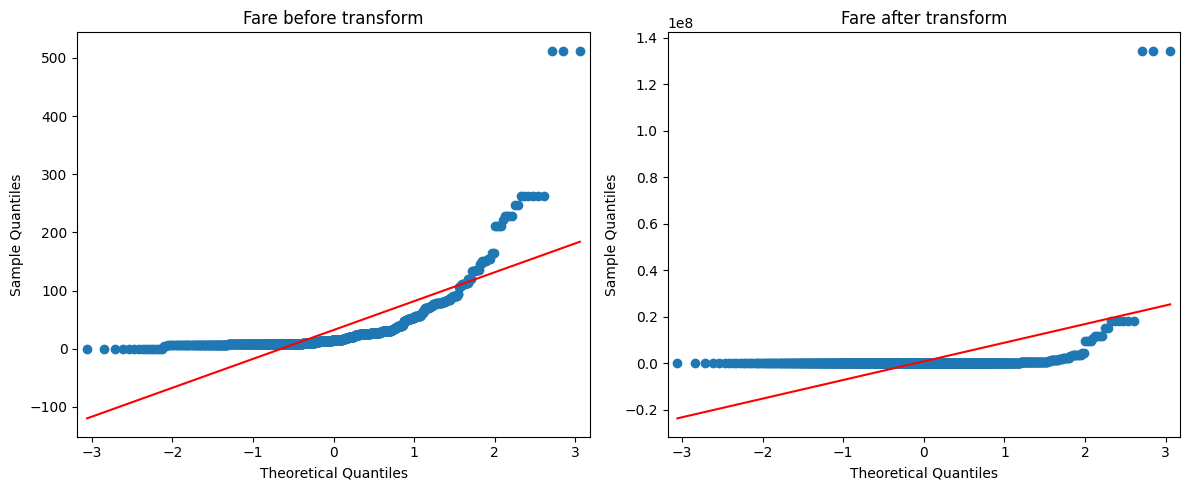

In [101]:
apply_transform(lambda x: x**3)

Accuracy 0.6589013732833957


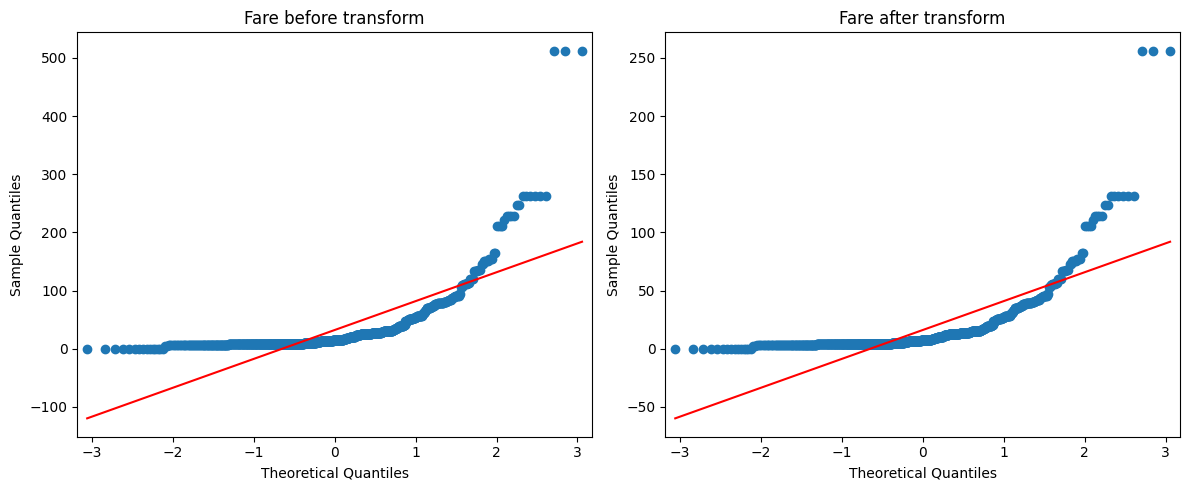

In [102]:
apply_transform(lambda x: x**1/2)

Accuracy 0.61729088639201


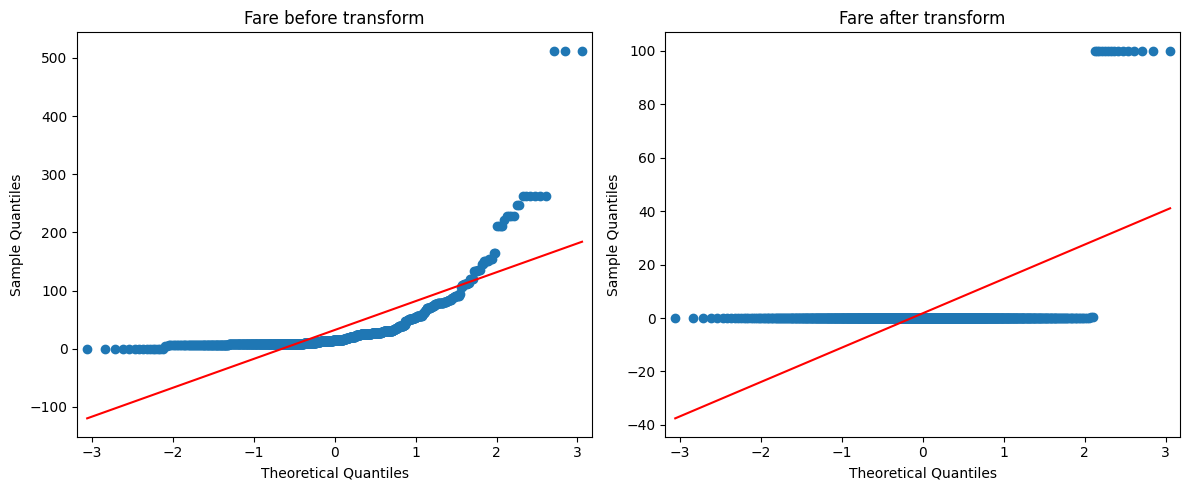

In [108]:
apply_transform(lambda x: 1/(x+0.01))

Accuracy 0.6195131086142323


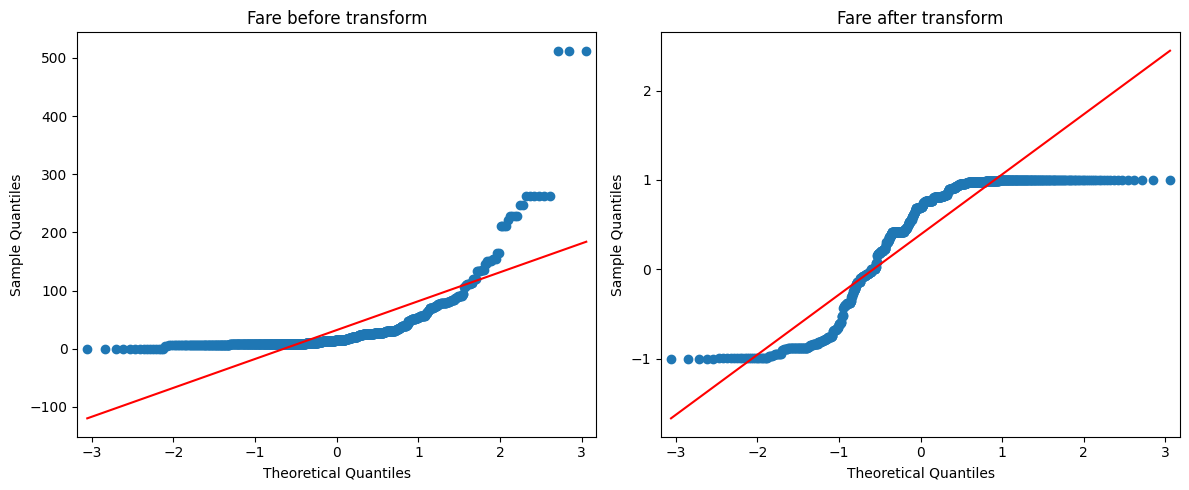

In [109]:
apply_transform(np.sin)

Accuracy 0.6712609238451936


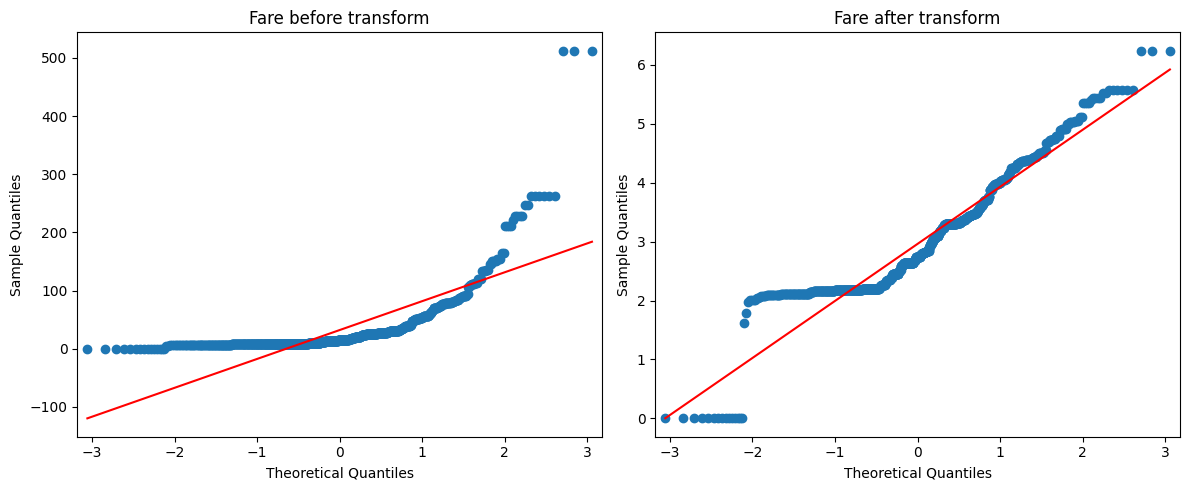

In [110]:
apply_transform(np.log1p)